# #Import Libraries

In [22]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VINAY\AppData\Roaming\nltk_data...


# Store the data
now we will extract ans store the date, the time and the news headline data from 
 url= https://finviz.com/quote.ashx?t=
 note= you can add the stock ticker after the url to get the news headlines of that particular stock.
 we will work with Amazon, Google and tesla stock.

In [14]:
web_url="https://finviz.com/quote.ashx?t="
news_tables={}
tickers=['AMZN','GOOG','TSLA']
for tick in tickers:
    url=web_url+tick
    req= Request(url=url, headers={"user-Agent":"chrome"})
    response=urlopen(req)
    html=BeautifulSoup(response,"html.parser")
    news_table=html.find(id="news-table")
    news_tables[tick]=news_table

# Print the Data
lets display the contents of the news_tables for Amzn and in similar way we can do for the other two stocks.

In [15]:
amazon = news_tables['AMZN']
amazon_tr = amazon.findAll('tr')

for x, table_row in enumerate(amazon_tr):
    a_text = table_row.a.text
    td_text = table_row.td.text
    print(a_text)
    print(td_text)
    if x == 3:
        break

This Ridiculously Cheap Warren Buffett Stock Could Make You Rich
Sep-19-22 06:00AM
Amazon halts construction of new warehouses in Spain until 2024 - El Confidencial
05:41AM
Amazon halts construction of new warehouses in Spain until 2024 - El Confidencial
05:39AM
If You Haven't Done So Yet, It's Time to Buy Qualcomm Stock
Sep-18-22 11:06AM


# parse the data into a python list


In [20]:
news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        
        text = i.a.get_text() 
        
        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]
        
        news_list.append([tick, date, time, text])

# Sentiment analysis
we can now use the nltk.sntiment.vader to perform sentiment analysis.

In [25]:
vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

news_df = pd.DataFrame(news_list, columns=columns)

scores = news_df['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

news_df = news_df.join(scores_df, rsuffix='_right')

news_df['date'] = pd.to_datetime(news_df.date).dt.date

print(news_df.head())

  ticker        date     time  \
0   AMZN  2022-09-19  06:00AM   
1   AMZN  2022-09-19  05:41AM   
2   AMZN  2022-09-19  05:39AM   
3   AMZN  2022-09-18  11:06AM   
4   AMZN  2022-09-18  10:00AM   

                                            headline    neg    neu    pos  \
0  This Ridiculously Cheap Warren Buffett Stock C...  0.171  0.571  0.257   
1  Amazon halts construction of new warehouses in...  0.000  0.866  0.134   
2  Amazon halts construction of new warehouses in...  0.000  0.866  0.134   
3  If You Haven't Done So Yet, It's Time to Buy Q...  0.000  1.000  0.000   
4  3 Top Growth Stocks for the New Upcoming Bull ...  0.000  0.614  0.386   

   compound  
0    0.2960  
1    0.1779  
2    0.1779  
3    0.0000  
4    0.5267  


# Visualize the Sentiment Scores

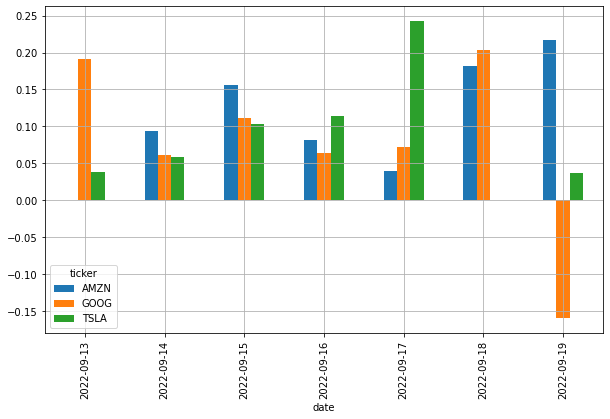

In [28]:
plt.rcParams['figure.figsize']=[10,6]

mean_scores=news_df.groupby(['ticker', 'date' ]).mean()

mean_scores=mean_scores.unstack()

mean_scores=mean_scores.xs('compound', axis = 'columns').transpose()

mean_scores.plot(kind='bar')

plt.grid()

plt.show()



In [ ]:
/